# Manipulating image channels

This recipe is about dealing with matrix channels. Getting access to individual channels, swapping them, and performing algebraic operations are all covered here.

In [1]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


image
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] [0.49803922 0.54901963 0.8901961 ] [0.46666667 0.53333336 0.88235295] ]  image: float32


<Figure size 216x216 with 0 Axes>

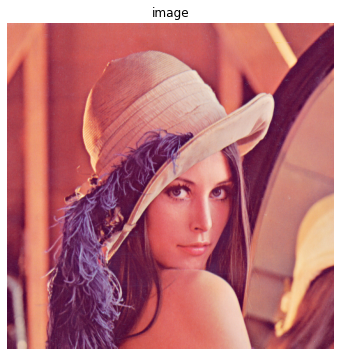

In [2]:
# Reading the image and scaling it
image = cv2.imread('data/Lena.png').astype(np.float32) / 255


######################################################
print_image('image', 'image',  image,0,1,0,10)
plt.figure(figsize=(3,3))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]]  ])

cv2.imshow('original', image.copy())
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
#Let's first learn how swapping works in Python
a = 5
b = 10
print("a={0}, b={1}".format(a,b))

#Swapping
print("Swapping")
b, a = a, b

print("a={0}, b={1}".format(a,b))

a=5, b=10
Swapping
a=10, b=5


image
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] [0.49803922 0.54901963 0.8901961 ] [0.46666667 0.53333336 0.88235295] ]  image: float32
image_swap
  Shape: (512, 512, 3)   Data type: float32
[ [0.8862745  0.5372549  0.49019608] [0.8862745  0.5372549  0.49019608] [0.8745098  0.5372549  0.52156866] [0.8745098  0.53333336 0.5019608 ] [0.8862745  0.5411765  0.47058824] [0.8862745  0.5058824  0.45490196] [0.89411765 0.5411765  0.48235294] [0.8901961 0.5254902 0.4862745] [0.8901961  0.54901963 0.49803922] [0.88235295 0.53333336 0.46666667] ]  image_swap: float32


<Figure size 288x288 with 0 Axes>

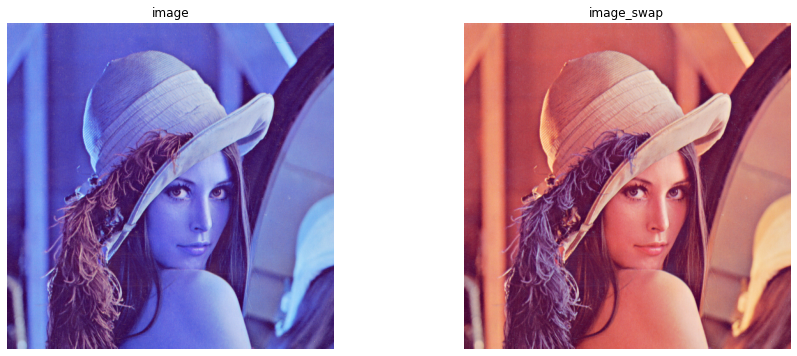

In [4]:
# Now here's the interesting part
# We know the the shape of the image is (H, W, C)
# Channel is the last dimension

# We also know that Images use B, G, R color scheme
# So we'll just swap the Blue channel with Red
image_swap = np.copy(image)
image_swap[:, :, [0, 2]] = image_swap[:, :, [2, 0]]


######################################################
print_image('image', 'image',  image,0,1,0,10)
print_image('image_swap', 'image_swap',  image_swap,0,1,0,10)
plt.figure(figsize=(4,4))
plt_view_image(plt,[["image",image], ["image_swap",image_swap]])

#and display the results
cv2.imshow('blue_and_red_swapped, ', np.hstack([image, image_swap]))
cv2.waitKey()
cv2.destroyAllWindows()

image
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] ]  image: float32
image_swap
  Shape: (512, 512, 3)   Data type: float32
[ [0.8862745  0.5372549  0.49019608] [0.8862745  0.5372549  0.49019608] [0.8745098  0.5372549  0.52156866] ]  swap: float32
image_clip_09
  Shape: (512, 512, 3)   Data type: float32
[ [0.44117647 0.5372549  0.8862745 ] [0.44117647 0.5372549  0.8862745 ] [0.4694118 0.5372549 0.8745098] ]  clip_09: float32
image_clip_15
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.8058824  0.8862745 ] [0.49019608 0.8058824  0.8862745 ] [0.52156866 0.8058824  0.8745098 ] ]  clip_15: float32
image_clip
  Shape: (512, 512, 3)   Data type: float32
[ [0.44117647 0.8058824  0.8862745 ] [0.44117647 0.8058824  0.8862745 ] [0.4694118 0.8058824 0.8745098] ]  image_clip: float32


<Figure size 1080x1080 with 0 Axes>

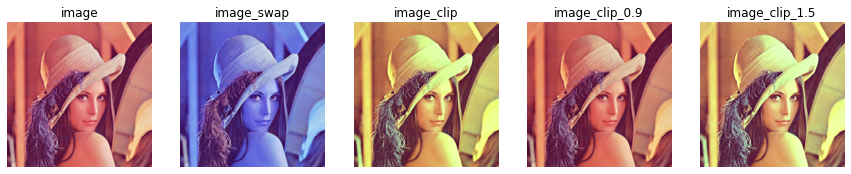

In [5]:
# We'll swap the channels back to original
#image_swap[:, :, [0, 2]] = image_swap[:, :, [2, 0]]

# Scale them differently to change the colorization of the image
image_clip = np.copy(image)
image_clip[:, :, 0] =  (image_clip[:, :, 0] * 0.9).clip(0, 1)
image_clip[:, :, 1] =  (image_clip[:, :, 1] * 1.5).clip(0, 1)

image_clip_09 = np.copy(image)
image_clip_09[:, :, 0] =  (image_clip_09[:, :, 0] * 0.9).clip(0, 1)
image_clip_15 = np.copy(image)
image_clip_15[:, :, 1] =  (image_clip_15[:, :, 1] * 1.5).clip(0, 1)


######################################################
print_image('image', 'image',  image,0,1,0,3)
print_image('image_swap', 'swap',  image_swap,0,1,0,3)
print_image('image_clip_09', 'clip_09',  image_clip_09,0,1,0,3)
print_image('image_clip_15', 'clip_15',  image_clip_15,0,1,0,3)
print_image('image_clip', 'image_clip',  image_clip,0,1,0,3)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]], 
                    ["image_swap",image_swap[:,:,[2,1,0]]],
                    ["image_clip",image_clip[:,:,[2,1,0]]],
                    ["image_clip_0.9",image_clip_09[:,:,[2,1,0]]],
                    ["image_clip_1.5",image_clip_15[:,:,[2,1,0]]]
                   ])

# Let's display the results
cv2.imshow('image_clip, ', np.hstack([image, image_clip]))
cv2.imshow('image_clip,  0.9, 1.5, ', np.hstack([image_clip,image_clip_09,image_clip_15]))
cv2.waitKey()
cv2.destroyAllWindows()